<a href="https://colab.research.google.com/github/Rmkh77/Lung-Disease-Prediction/blob/main/lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
path = 'cancer patient data sets.csv'
data = pd.read_csv(path)
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data = data.drop(['index','Patient Id'], axis=1)
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data['Level'] = data['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

In [ ]:
data['Level'].value_counts()

Level
3    365
2    332
1    303
Name: count, dtype: int64

In [ ]:
data = data.drop(['OccuPational Hazards','Genetic Risk','Weight Loss','Clubbing of Finger Nails',"Coughing of Blood",'Passive Smoker'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    1000 non-null   int64
 1   Gender                 1000 non-null   int64
 2   Air Pollution          1000 non-null   int64
 3   Alcohol use            1000 non-null   int64
 4   Dust Allergy           1000 non-null   int64
 5   chronic Lung Disease   1000 non-null   int64
 6   Balanced Diet          1000 non-null   int64
 7   Obesity                1000 non-null   int64
 8   Smoking                1000 non-null   int64
 9   Passive Smoker         1000 non-null   int64
 10  Chest Pain             1000 non-null   int64
 11  Coughing of Blood      1000 non-null   int64
 12  Fatigue                1000 non-null   int64
 13  Shortness of Breath    1000 non-null   int64
 14  Wheezing               1000 non-null   int64
 15  Swallowing Difficulty  1000 non-null   

In [ ]:
data['Dust Allergy'] = data['Dust Allergy'].replace({1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1})

In [ ]:
data['Balanced Diet'] = data['Balanced Diet'].replace({1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1})

In [ ]:
data['Obesity'] = data['Obesity'].replace({1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1})

In [ ]:
data['Passive Smoker']= data['Passive Smoker'].replace({1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1})

<Axes: xlabel='Level', ylabel='count'>

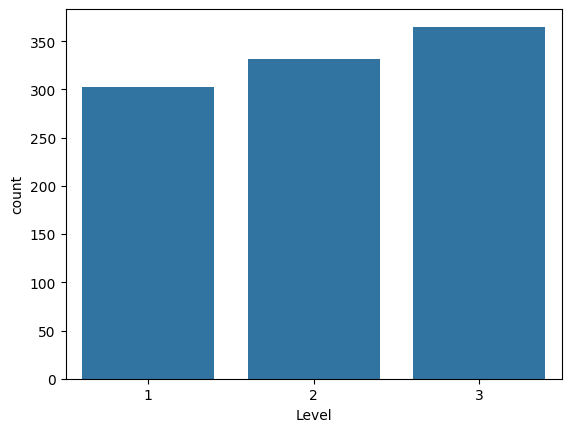

In [ ]:
sn.countplot(data= data ,x='Level')

<Axes: >

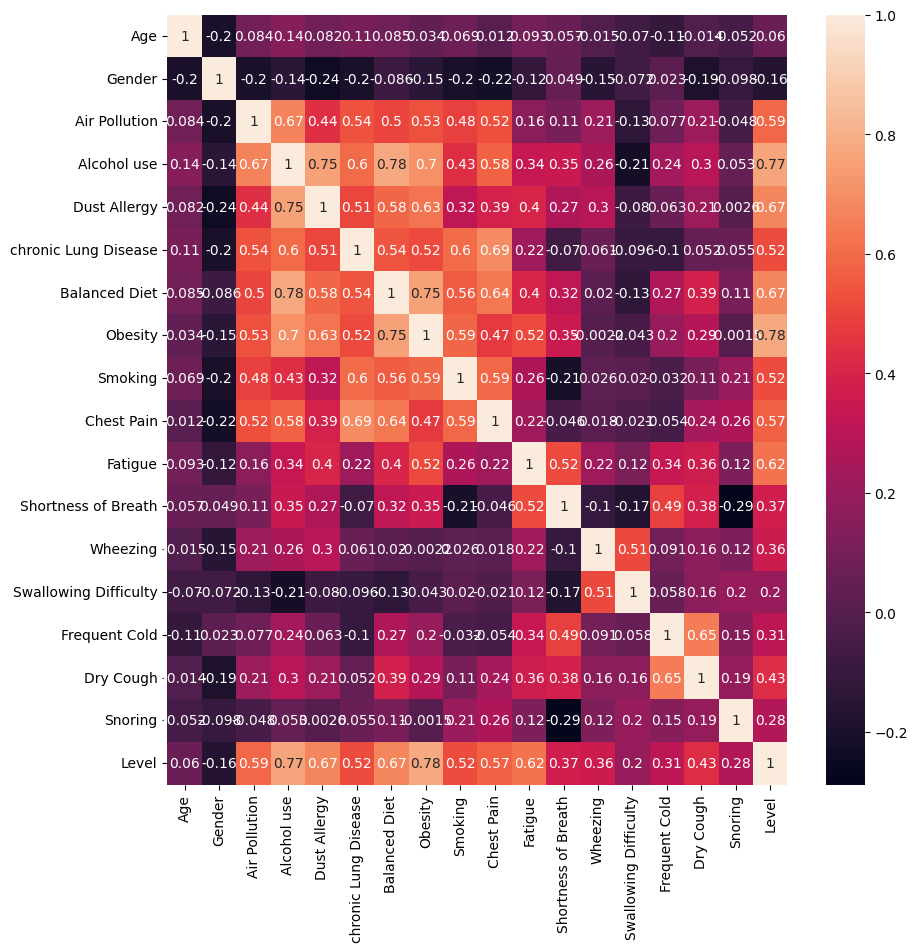

In [ ]:
plt.figure(figsize=(10,10))
sn.heatmap(data.corr() ,annot = True)

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
data=data.drop(['Gender'], axis=1)

In [ ]:
x = data.drop('Level' , axis=1)
y = data[['Level']]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,random_state = 42 ,test_size = .30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
cm = confusion_matrix(ytest,dtc.predict(xtest))
cm

array([[10,  1,  0],
       [ 0, 17,  0],
       [ 1,  0, 17]])

              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       0.94      1.00      0.97        17
           3       1.00      0.94      0.97        18

    accuracy                           0.96        46
   macro avg       0.95      0.95      0.95        46
weighted avg       0.96      0.96      0.96        46



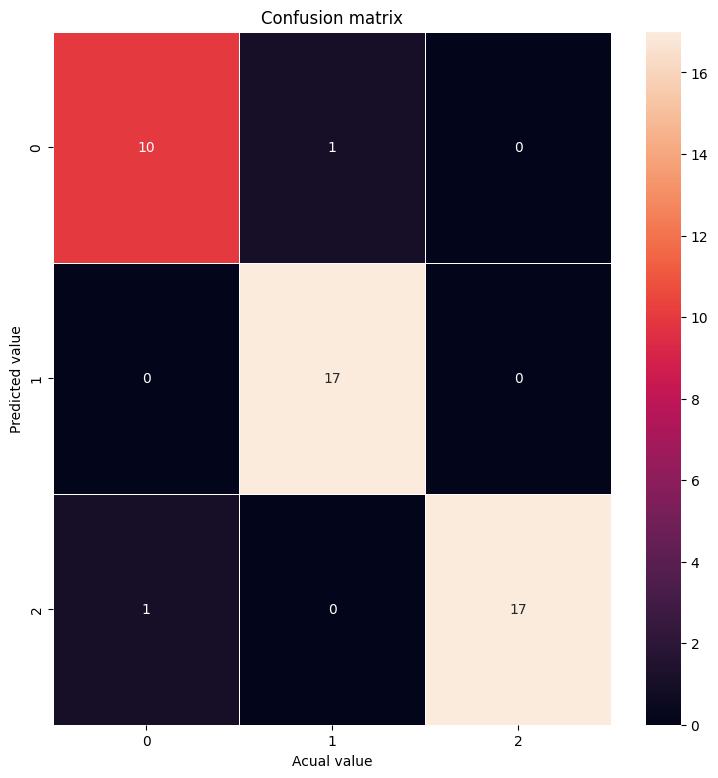

In [ ]:
plt.figure(figsize=(9,9))
sn.heatmap(cm,annot = True ,linewidth=.5)
plt.xlabel('Acual value')
plt.ylabel('Predicted value')
plt.title('Confusion matrix')


print(classification_report(ytest,dtc.predict(xtest)))


In [ ]:
dtc.score(xtest,ytest)


0.9565217391304348